# Using monthly sales data to perform different types of analysis

In [78]:
import pandas as pd
import os
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go

In [229]:
from plotly.subplots import make_subplots

In [165]:
from itertools import combinations
from collections import Counter

In [4]:
wd = os.getcwd()

In [8]:
files = os.listdir('./Sales_Data')

In [19]:
df = pd.DataFrame()

In [20]:
for file in files:
    temp = pd.read_csv('Sales_Data/' + file)
    df = pd.concat([df,temp])

#### Adding a month column

In [25]:
df['Order Date']

0        12/30/19 00:01
1        12/29/19 07:03
2        12/12/19 18:21
3        12/22/19 15:13
4        12/18/19 12:38
              ...      
13617    06/07/19 19:02
13618    06/01/19 19:29
13619    06/22/19 18:57
13620    06/26/19 18:35
13621    06/25/19 14:33
Name: Order Date, Length: 186850, dtype: object

In [32]:
df['Month'] = df['Order Date'].str[0:2]

In [45]:
df['Month'] = df['Month'].astype('int')

<ipython-input-45-af3c224bf610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int')


In [37]:
#Cleaning up the data

In [40]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [43]:
df = df[df['Month'] !='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


In [46]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


#### Adding a sales column

In [48]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [56]:
df['Quantity Ordered'] =  df['Quantity Ordered'].astype('int')
df['Price Each'] =  df['Price Each'].astype('float')

<ipython-input-56-64b8821d5f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] =  df['Quantity Ordered'].astype('int')
<ipython-input-56-64b8821d5f7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] =  df['Price Each'].astype('float')


In [58]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

<ipython-input-58-bbb50617537f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [67]:
Monthly_sales_data = df.groupby('Month').sum()

In [69]:
Monthly_sales_data.reset_index(inplace=True)

In [70]:
Monthly_sales_data

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06
5,6,15253,2.562026e+06,2.577802e+06
6,7,16072,2.632540e+06,2.647776e+06
7,8,13448,2.230345e+06,2.244468e+06
8,9,13109,2.084992e+06,2.097560e+06
9,10,22703,3.715555e+06,3.736727e+06


### Which month had the highest sales?

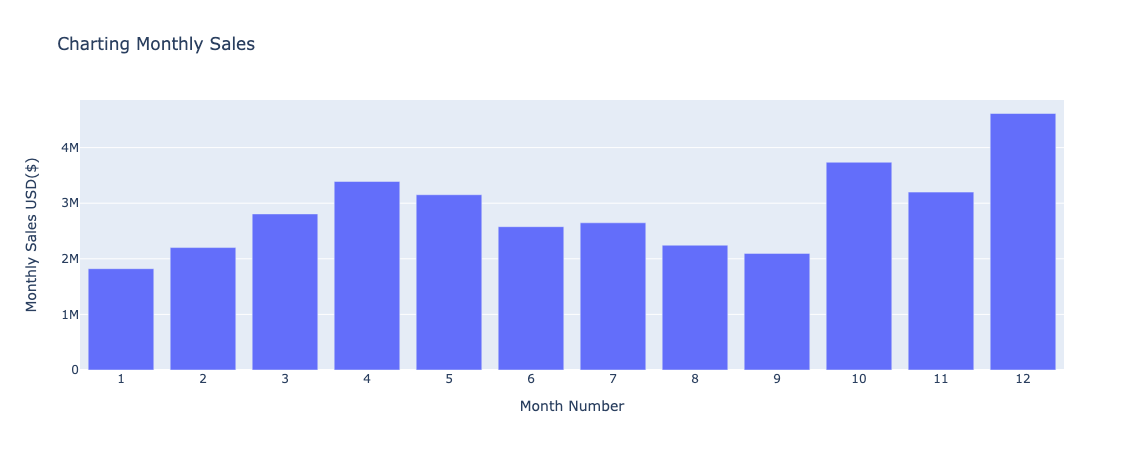

In [260]:
figure = go.Figure(go.Bar(x=Monthly_sales_data['Month'],y=Monthly_sales_data['Sales']))

figure.update_layout(
    title="Charting Monthly Sales",
    yaxis_title="Monthly Sales USD($)",
    xaxis=dict(
        title='Month Number',
        tickmode='linear')
)

go.Figure.write_html(figure,'Charting Monthly Sales.html',include_plotlyjs='cdn')

figure.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [93]:
# Creating a city column

In [102]:
# Creating a function to obtain city:
def cityobtainer(observation):
    return observation.split(',')[1]

In [109]:
def stateobtainer(observation):
    return observation.split(',')[2][:3]

In [103]:
df['City'] = df['Purchase Address'].apply(cityobtainer)

<ipython-input-103-23a8982e2bae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
df['City&State'] = df['Purchase Address'].apply(lambda x: cityobtainer(x) + stateobtainer(x))

<ipython-input-110-6efc2c5c4ace>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City&State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta GA
...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,Boston MA
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,New York City NY
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA


In [112]:
#Creating per city Sales Data

In [114]:
Sales_data_for_city = df[['City&State','Sales']].groupby('City&State').sum().reset_index()

In [117]:
Sales_data_for_city = Sales_data_for_city.sort_values(by='Sales')

### Which City had the highest sales?

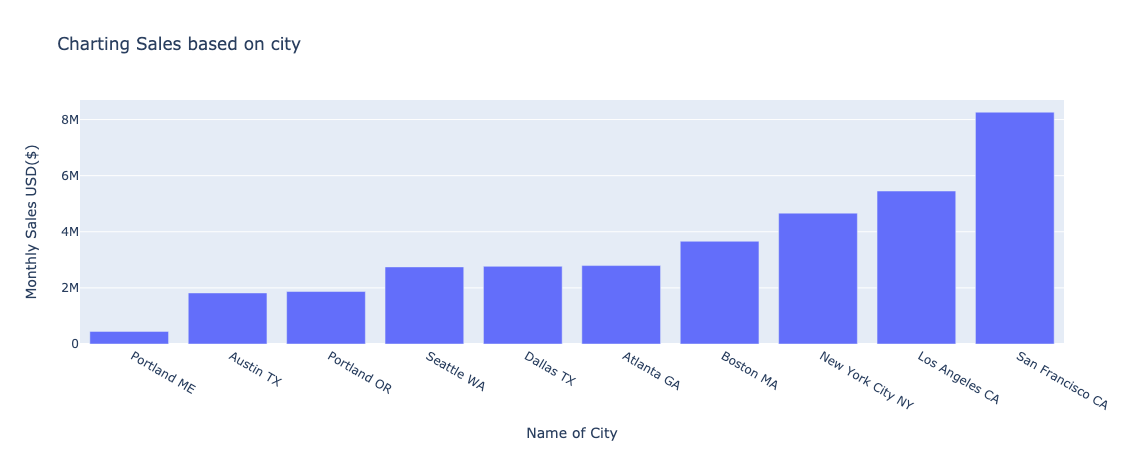

In [261]:
figure = go.Figure(go.Bar(x=Sales_data_for_city['City&State'],y=Sales_data_for_city['Sales']))

figure.update_layout(
    title="Charting Sales based on city",
    yaxis_title="Monthly Sales USD($)",
    xaxis=dict(
        title='Name of City',
        tickmode='linear')
)
go.Figure.write_html(figure,'Charting Sales Based on City.html',include_plotlyjs='cdn')

figure.show()

In [122]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-122-f5779b1b9e1a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
df['Hour'] = df['Order Date'].dt.hour

<ipython-input-127-777e3f28a5cf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City&State,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta GA,12
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,Boston MA,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,New York City NY,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18


In [131]:
Quantity_ordered_by_hour =  df[['Hour','Quantity Ordered']].groupby('Hour').count().reset_index()

In [132]:
Quantity_ordered_by_hour

,Hour,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


### When is it the best time to advertise?

In [ ]:
go.scatter.Line

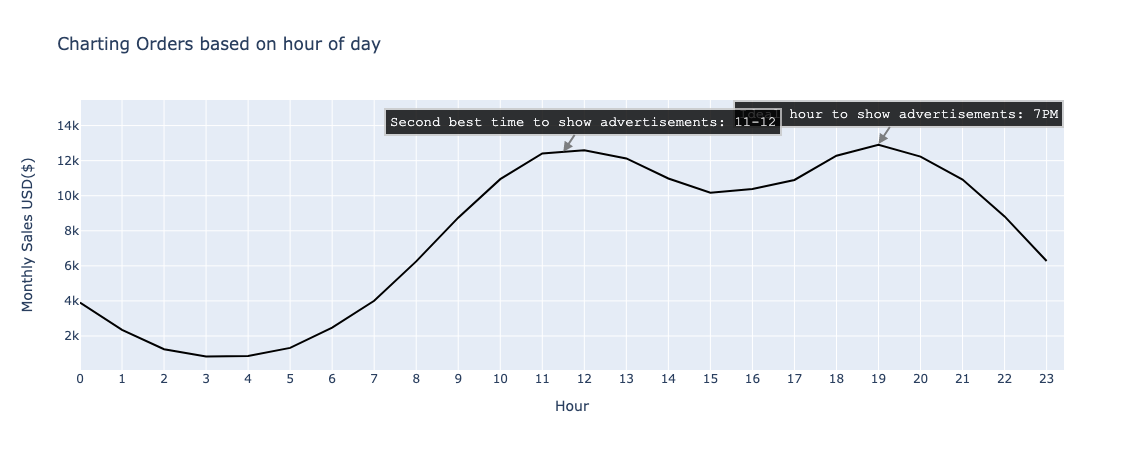

In [262]:
figure = go.Figure(go.Scatter(x=Quantity_ordered_by_hour['Hour'],y=Quantity_ordered_by_hour['Quantity Ordered'],line_color='black'))

figure.update_layout(
    title="Charting Orders based on hour of day",
    yaxis_title="Monthly Sales USD($)",
    xaxis=dict(
        title='Hour',
        tickmode='linear')
)
figure.add_annotation(
        x=19,
        y=12950,
        xref="x",
        yref="y",
        text="Ideal hour to show advertisements: 7PM",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="black",
        opacity=0.8
        )

figure.add_annotation(
        x=11.5,
        y=12500,
        xref="x",
        yref="y",
        text="Second best time to show advertisements: 11-12",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="black",
        opacity=0.8
        )

go.Figure.write_html(figure,'Best Time to Advertise.html',include_plotlyjs='cdn')

figure.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## What products are most often sold together?

In [146]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City&State,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta GA,12
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,Boston MA,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,New York City NY,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18


In [151]:
Products_sold_together = df[df['Order ID'].duplicated(keep=False)]

In [152]:
Products_sold_together

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City&State,Hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,Boston MA,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,Boston MA,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,Boston MA,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,Boston MA,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,New York City NY,14
...,...,...,...,...,...,...,...,...,...,...,...
13592,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,Los Angeles CA,11
13594,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City,New York City NY,12
13595,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City,New York City NY,12
13614,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,New York City NY,22


In [154]:
Products_sold_together['Grouped Products'] = Products_sold_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-154-22acf9c5ee9a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
Products_sold_together = Products_sold_together[['Order ID','Grouped Products']].drop_duplicates()

In [164]:
Products_sold_together

,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
13570,222863,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,"iPhone,Apple Airpods Headphones"
13591,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,"Google Phone,USB-C Charging Cable"


In [166]:
count = Counter()

In [168]:
for row in Products_sold_together['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [172]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [188]:
Most_common_products = count.most_common(10)

In [179]:
count.most_common()

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [177]:
count.most_common()[-30:-1]

[(('20in Monitor', 'LG Washing Machine'), 1),
 (('LG Dryer', 'Google Phone'), 1),
 (('Google Phone', 'Vareebadd Phone'), 1),
 (('20in Monitor', 'iPhone'), 1),
 (('LG Dryer', 'Vareebadd Phone'), 1),
 (('Vareebadd Phone', '27in FHD Monitor'), 1),
 (('ThinkPad Laptop', '27in 4K Gaming Monitor'), 1),
 (('20in Monitor', 'Flatscreen TV'), 1),
 (('USB-C Charging Cable', 'LG Dryer'), 1),
 (('LG Washing Machine', '20in Monitor'), 1),
 (('Flatscreen TV', '20in Monitor'), 1),
 (('27in FHD Monitor', 'Google Phone'), 1),
 (('iPhone', '27in FHD Monitor'), 1),
 (('LG Dryer', 'AAA Batteries (4-pack)'), 1),
 (('ThinkPad Laptop', '34in Ultrawide Monitor'), 1),
 (('iPhone', 'LG Washing Machine'), 1),
 (('AAA Batteries (4-pack)', 'LG Dryer'), 1),
 (('LG Dryer', '27in 4K Gaming Monitor'), 1),
 (('LG Dryer', 'Flatscreen TV'), 1),
 (('LG Dryer', 'Lightning Charging Cable'), 1),
 (('ThinkPad Laptop', 'LG Dryer'), 1),
 (('LG Washing Machine', 'AA Batteries (4-pack)'), 1),
 (('27in FHD Monitor', 'LG Washing Mac

In [181]:
 least_common_products = [(('Macbook Pro Laptop', 'Flatscreen TV'), 1),
 (('ThinkPad Laptop', 'Vareebadd Phone'), 1),
 (('Google Phone', 'Flatscreen TV'), 1),
 (('27in 4K Gaming Monitor', 'Vareebadd Phone'), 1),
 (('27in FHD Monitor', 'iPhone'), 1),
 (('Vareebadd Phone', 'Lightning Charging Cable'), 1),
 (('LG Washing Machine', 'Google Phone'), 1),
 (('LG Washing Machine', 'Wired Headphones'), 1),
 (('27in FHD Monitor', 'Vareebadd Phone'), 1),
 (('LG Washing Machine', '27in 4K Gaming Monitor'), 1),
 (('LG Washing Machine', 'Apple Airpods Headphones'), 1),
 (('27in 4K Gaming Monitor', 'LG Dryer'), 1),
 (('20in Monitor', 'LG Washing Machine'), 1),
 (('LG Dryer', 'Google Phone'), 1),
 (('Google Phone', 'Vareebadd Phone'), 1),
 (('20in Monitor', 'iPhone'), 1),
 (('LG Dryer', 'Vareebadd Phone'), 1),
 (('Vareebadd Phone', '27in FHD Monitor'), 1),
 (('ThinkPad Laptop', '27in 4K Gaming Monitor'), 1),
 (('20in Monitor', 'Flatscreen TV'), 1),
 (('USB-C Charging Cable', 'LG Dryer'), 1),
 (('LG Washing Machine', '20in Monitor'), 1),
 (('Flatscreen TV', '20in Monitor'), 1),
 (('27in FHD Monitor', 'Google Phone'), 1),
 (('iPhone', '27in FHD Monitor'), 1),
 (('LG Dryer', 'AAA Batteries (4-pack)'), 1),
 (('ThinkPad Laptop', '34in Ultrawide Monitor'), 1),
 (('iPhone', 'LG Washing Machine'), 1),
 (('AAA Batteries (4-pack)', 'LG Dryer'), 1),
 (('LG Dryer', '27in 4K Gaming Monitor'), 1),
 (('LG Dryer', 'Flatscreen TV'), 1),
 (('LG Dryer', 'Lightning Charging Cable'), 1),
 (('ThinkPad Laptop', 'LG Dryer'), 1),
 (('LG Washing Machine', 'AA Batteries (4-pack)'), 1),
 (('27in FHD Monitor', 'LG Washing Machine'), 1),
 (('LG Dryer', '27in FHD Monitor'), 1),
 (('20in Monitor', '34in Ultrawide Monitor'), 1),
 (('34in Ultrawide Monitor', '20in Monitor'), 1),
 (('34in Ultrawide Monitor', 'LG Washing Machine'), 1),
 (('Google Phone', '27in 4K Gaming Monitor'), 1),
 (('LG Washing Machine', 'iPhone'), 1),
 (('LG Dryer', 'Wired Headphones'), 1)]

In [182]:
least_common_products[0]

(('Macbook Pro Laptop', 'Flatscreen TV'), 1)

In [185]:
lcpname = []

for key, value in least_common_products:
    lcpname.append(key)

In [189]:
mcpname = []
mcpvalue = []

for key, value in Most_common_products:
    mcpname.append(key)
    mcpvalue.append(value)

In [192]:
len(mcpname)

10

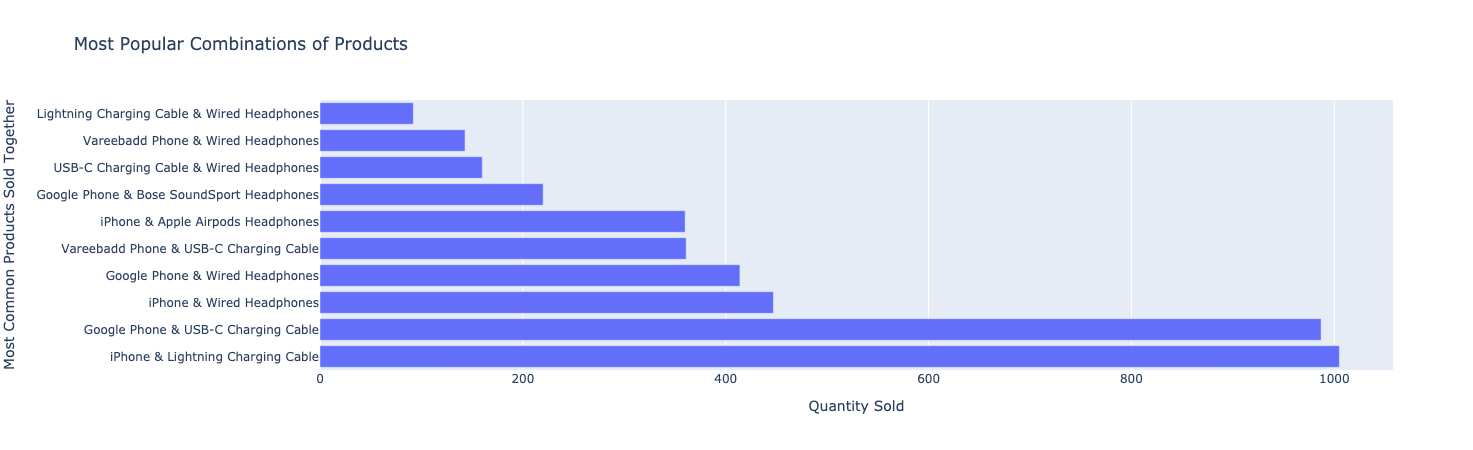

In [253]:
fig = px.bar(x=mcpvalue, y=mcptemp, orientation='h',labels = {'x':'Quantity Sold','y':'Most Common Products Sold Together'},title ='Most Popular Combinations of Products')

go.Figure.write_html(fig,'Most Popular Combinations of Products.html',include_plotlyjs='cdn')

fig.show()

In [194]:
mcpname

[('iPhone', 'Lightning Charging Cable'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Wired Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('Vareebadd Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]

In [195]:
mcpvalue

[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]

In [207]:
mcptemp = []
for key in mcpname:
    z = key[0] + " & " + key[1]
    mcptemp.append(z)

In [208]:
mcptemp

['iPhone & Lightning Charging Cable',
 'Google Phone & USB-C Charging Cable',
 'iPhone & Wired Headphones',
 'Google Phone & Wired Headphones',
 'Vareebadd Phone & USB-C Charging Cable',
 'iPhone & Apple Airpods Headphones',
 'Google Phone & Bose SoundSport Headphones',
 'USB-C Charging Cable & Wired Headphones',
 'Vareebadd Phone & Wired Headphones',
 'Lightning Charging Cable & Wired Headphones']

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### What Product Sold the most?

In [220]:
Products_sold = df[['Product','Quantity Ordered']].groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=False).reset_index()

In [221]:
Products_sold

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


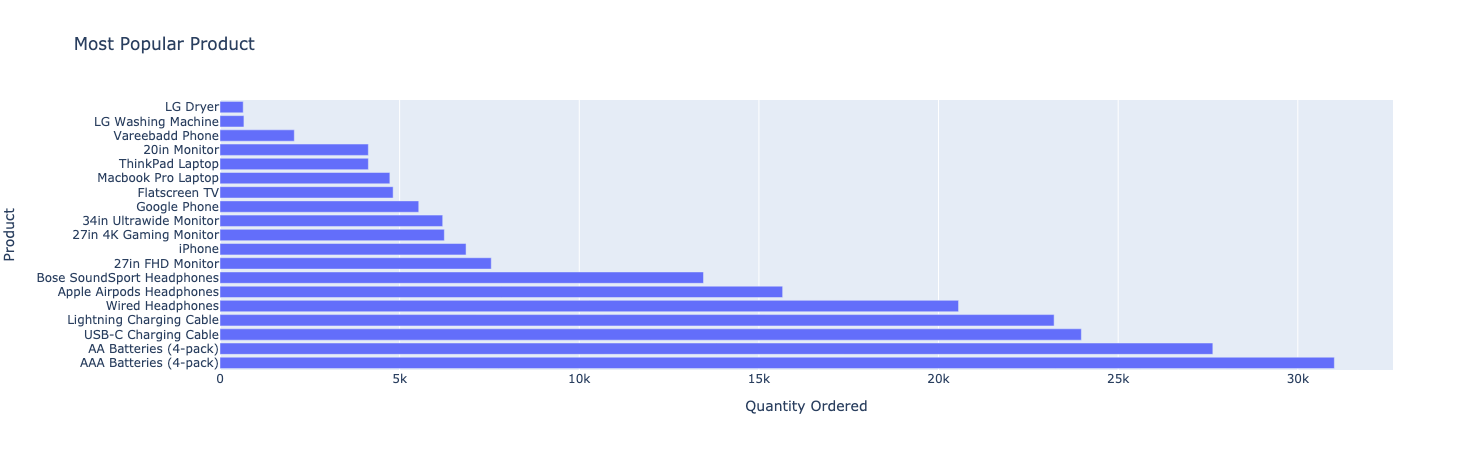

In [252]:
fig = px.bar(data_frame=Products_sold,x='Quantity Ordered', y='Product', orientation='h',labels = {'x':'Quantity Sold','y':'Products'},title ='Most Popular Product')
fig.update_layout(yaxis=dict(
        tickmode='linear'))
go.Figure.write_html(fig,'Most Popular Product.html',include_plotlyjs='cdn')
fig.show()

In [231]:
Products_price = df[['Product','Price Each']].groupby('Product').mean().reset_index()

In [234]:
Products = pd.merge(Products_sold,Products_price,on='Product')
Products

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


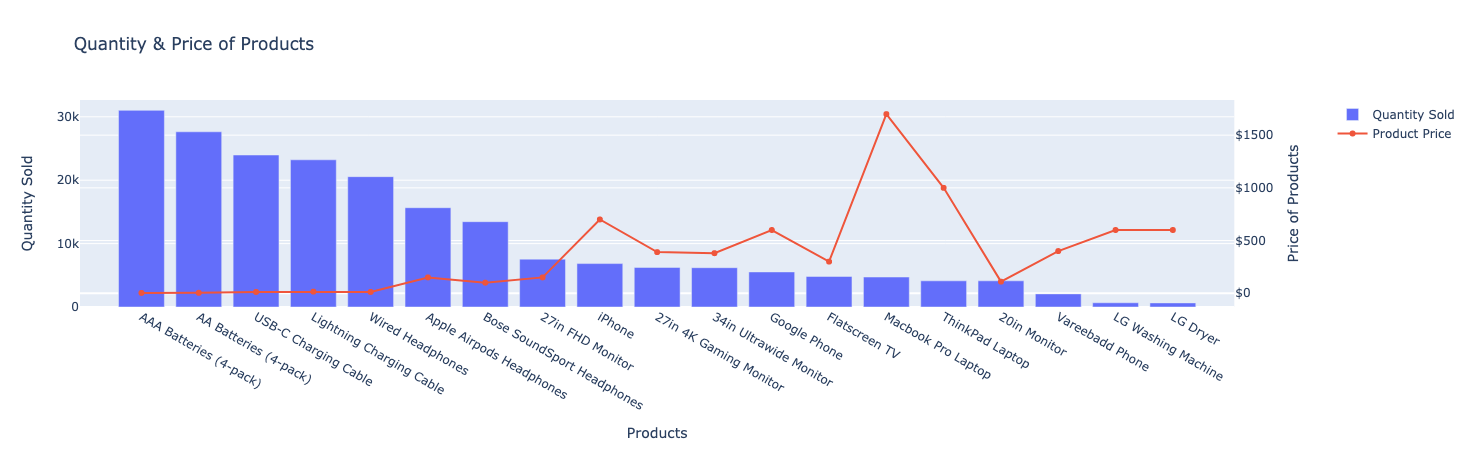

In [250]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=Products['Product'], y=Products['Quantity Ordered'],name="Quantity Sold"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=Products['Product'], y=Products['Price Each'], name="Product Price"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Products")

fig.update_yaxes(title_text="Quantity Sold", secondary_y=False)
fig.update_yaxes(title_text="Price of Products", tickformat='$', secondary_y=True, )

fig.update_layout(title='Quantity & Price of Products')

fig.update_layout(xaxis=dict(
        tickmode='linear'))

fig.show()

In [251]:
go.Figure.write_html(fig,'Quantity & Price of Products.html',include_plotlyjs='cdn')

In [244]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City&State,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta GA,12
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,Boston MA,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,New York City NY,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,San Francisco CA,18


In [245]:
pd.DataFrame.to_csv(df,'Output/Final_DataFrame.csv')